In [1]:
# importing libraries

import numpy as np
import os
import pandas as  pd 
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
print(os.getcwd())

c:\AI_ML\projects\facial_recognition


In [3]:
# Loading the dataset
dataset = pd.read_csv(r'C:\AI_ML\projects\facial_recognition\fer2013.csv')

print(dataset.head())


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [4]:
len(dataset.pixels[0])

8287

In [5]:
str_arr = dataset.pixels[0]
str_arr



'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [6]:
pixels_arr = np.array(str_arr.split(),dtype=int)

In [7]:
image = pixels_arr.reshape(48,48)

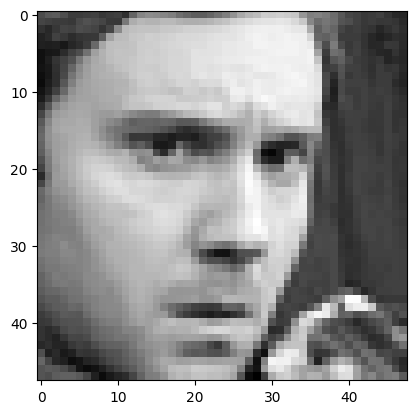

In [8]:
plt.imshow(image,cmap='gray')

In [9]:
str_arr

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [10]:
#Data Preprocessing
class_labels = ['Anger','Disgust','Fear','Happy','Neutral','Sadness','Surprise']

fig =  px.bar(x=class_labels,
              y = [list(dataset['emotion']).count(i) for i in np.unique(dataset['emotion'])],
              color = np.unique(dataset['emotion']),
              color_continuous_scale="greens")

fig.update_xaxes(title='Emotions')
fig.update_yaxes(title='Number of images')
fig.update_layout(showlegend=True,
                  title={
                      'text': 'Train Data distribution',
                      'y':0.95,
                      'x': 0.5,
                      'xanchor': 'center',
                      'yanchor':'top'
                  })

fig.show()

In [11]:
dataset = dataset.sample(frac=1)

In [12]:
labels = to_categorical(dataset[['emotion']],num_classes=7)

In [13]:
len(dataset['pixels'])

35887

In [14]:
dataset['pixels'][3]

'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

In [15]:
train_pixels = dataset['pixels'].astype(str).str.split(" ").tolist()

train_pixels = np.uint8(train_pixels)
len(train_pixels)

35887

In [16]:
pixels = train_pixels.reshape(35887,48,48,1)

In [17]:
# train test validation split

X_train,X_test,y_train,y_test = train_test_split(pixels,labels,test_size=0.1,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,shuffle=True)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


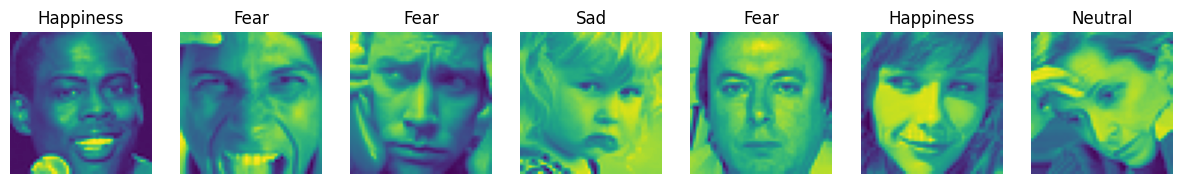

In [19]:
plt.figure(figsize=(15,23))
label = {0:'Angry',1:'Disgust',2:'Fear',3:'Happiness',4:'Sad',5:'Surprise',6:'Neutral'}
i=1
for i in range(7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label[index])
    plt.axis('off')
    i+=1

plt.show()    

In [20]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

data.fit(X_train)
data.fit(X_val)


In [22]:
# model architecture

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)      

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,          
    restore_best_weights=True,
    verbose=1
)
model_checkpoint = ModelCheckpoint(
    'model_weights.h5',
    monitor='val_accuracy',  
    save_best_only=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=64,
    validation_data=((X_test, y_test)),
    callbacks=[early_stopping,model_checkpoint],
    verbose=1
)


NameError: name 'model' is not defined

In [22]:
loss = model.evaluate(X_test,y_test)
print(str(loss[1]))

NameError: name 'model' is not defined

In [25]:
preds = model.predict(X_test)
y_pred = np.argmax(preds,axis=1)

113/113 [==============================] - 4s 29ms/step


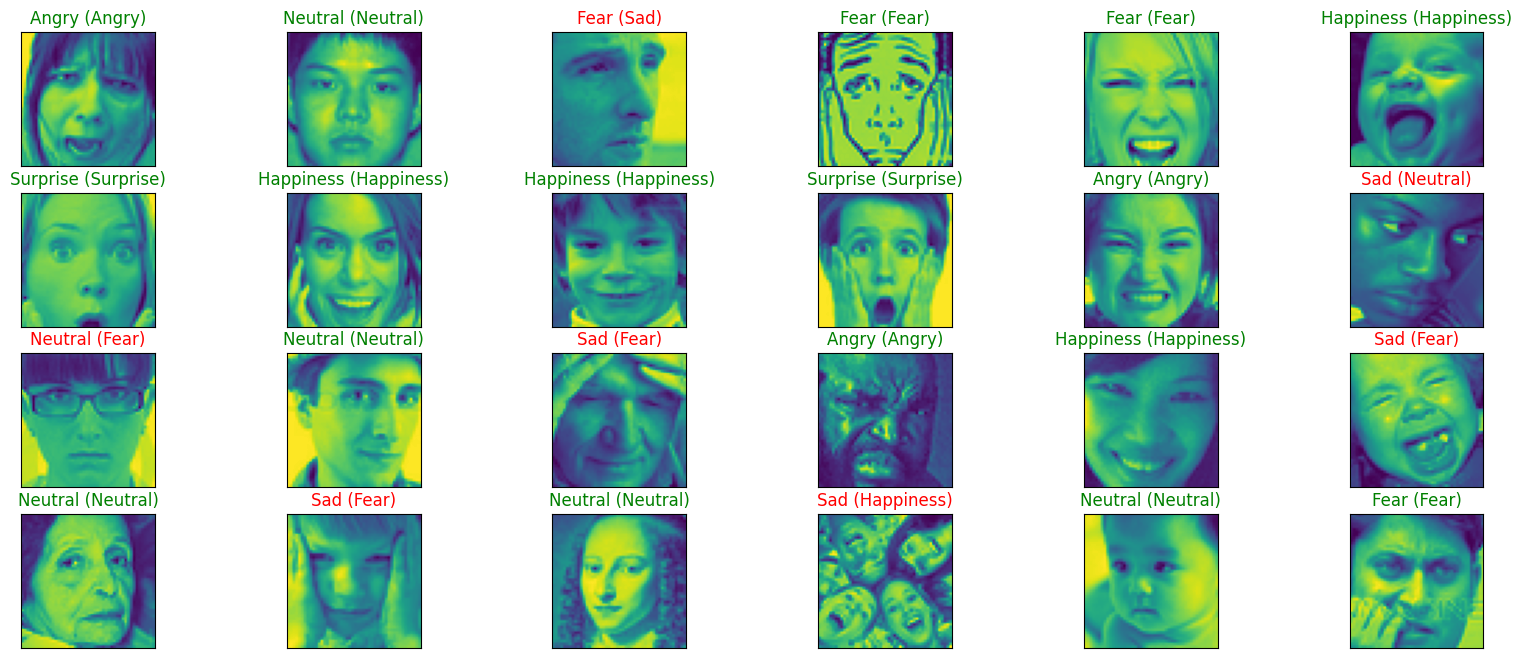

In [26]:
label = {0:'Angry',1:'Disgust',2:'Fear',3:'Happiness',4:'Sad',5:'Surprise',6:'Neutral'}

figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(X_test.shape[0],size=24,replace='False')):
    ax = figure.add_subplot(4,6,i+1,xticks=[],yticks=[])

    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label[(y_pred[index])]
    true_index = label[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),(true_index)),color=("green" if predict_index==true_index else "red"))

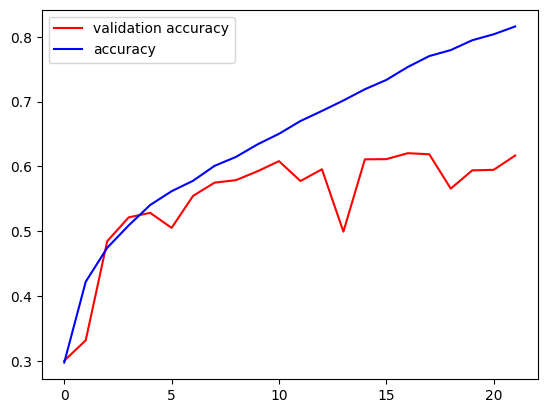

In [ ]:
plt.plot(history.history["val_accuracy"],'r',label="validation accuracy")
plt.plot(history.history["accuracy"],'b',label="accuracy")
plt.legend()

In [ ]:
model.save(r'C:\AI_ML\projects\facial_recognition\mymodel.h5')

In [ ]:
model.save_weights(r'C:\AI_ML\projects\facial_recognition\model_weights.h5')